In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
GameInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/GameInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayScoreInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchAwayScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayTeamInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchAwayTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchEventInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchEventInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeScoreInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchHomeScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeTeamInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchHomeTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchRoundInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchRoundInfo.csv").drop(columns=["Unnamed: 0"])
MatchTimeInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"])
MatchSeasonInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchSeasonInfo.csv").drop(columns=["Unnamed: 0"])
MatchTournamentInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchTournamentInfo.csv").drop(columns=["Unnamed: 0"])
MatchVenueInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchVenueInfo.csv").drop(columns=["Unnamed: 0"])
MatchVotesInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchVotesInfo.csv").drop(columns=["Unnamed: 0"])
OddsInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/OddsInfo.csv").drop(columns=["Unnamed: 0"])
PeriodInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/PeriodInfo.csv").drop(columns=["Unnamed: 0"])
PowerInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/PowerInfo.csv").drop(columns=["Unnamed: 0"])

In [85]:
AllPlayers = pd.concat([MatchAwayTeamInfo['player_id'] , MatchHomeTeamInfo['player_id']])
AllPlayers.unique()

array([370698,  98607, 371052, ...,  23664, 216040, 291827])

In [86]:
player_info = pd.concat([MatchAwayTeamInfo[["player_id", "height"]]
                        , MatchHomeTeamInfo[["player_id", "height"]]])
playerId = player_info['player_id'].unique()
playerId

array([370698,  98607, 371052, ...,  23664, 216040, 291827])

In [36]:
dataWith_NoNA = player_info[~(player_info['height'].isna())]
AvgValue= dataWith_NoNA['height'].sum()/dataWith_NoNA['height'].count()


In [51]:
MatchTimeInfo.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,12303632,1939.0,2650.0,2940.0,NaN,NaN,1.714822e+09
1,12276833,1813.0,1793.0,3258.0,NaN,NaN,1.714737e+09
2,12304192,1745.0,3799.0,NaN,NaN,NaN,1.714822e+09
3,12299621,2798.0,2584.0,2527.0,NaN,NaN,1.714718e+09
4,12297829,2804.0,4165.0,3689.0,NaN,NaN,1.714746e+09


In [66]:
MatchTimeInfo.fillna(0)

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,12303632,1939.0,2650.0,2940.0,0.0,0.0,1.714822e+09
1,12276833,1813.0,1793.0,3258.0,0.0,0.0,1.714737e+09
2,12304192,1745.0,3799.0,0.0,0.0,0.0,1.714822e+09
3,12299621,2798.0,2584.0,2527.0,0.0,0.0,1.714718e+09
4,12297829,2804.0,4165.0,3689.0,0.0,0.0,1.714746e+09
...,...,...,...,...,...,...,...
19671,12317323,2377.0,2099.0,2623.0,0.0,0.0,1.715767e+09
19672,12334523,2693.0,4643.0,0.0,0.0,0.0,1.715781e+09
19673,12327448,1845.0,2002.0,0.0,0.0,0.0,1.715767e+09
19674,12335029,1968.0,2331.0,0.0,0.0,0.0,1.715710e+09


In [78]:
MatchTimeInfo = MatchTimeInfo.fillna(0)
MatchTimeInfo['SumOfTimes'] = MatchTimeInfo[['period_1','period_2','period_3', 'period_4','period_5']].sum(axis=1)
avgTime = MatchTimeInfo['SumOfTimes'].mean()
print(f"the average of the game times is {avgTime} seconds of about {avgTime/60} hours ")


the average of the game times is 5046.799806871315 seconds of about 84.11333011452191 hours 


In [74]:
MatchTimeInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19676 entries, 0 to 19675
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        19676 non-null  int64  
 1   period_1                        19676 non-null  float64
 2   period_2                        19676 non-null  float64
 3   period_3                        19676 non-null  float64
 4   period_4                        19676 non-null  float64
 5   period_5                        19676 non-null  float64
 6   current_period_start_timestamp  19676 non-null  float64
 7   SumOfTimes                      19676 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [94]:
#which player has the highest number of wins 



players_with_ranks = pd.concat([MatchHomeTeamInfo[['full_name' , 'current_rank']] , MatchAwayTeamInfo[['full_name' , 'current_rank']]])
players_with_ranks = players_with_ranks.drop_duplicates(subset=['full_name'])
players_with_ranks.sort_values('current_rank' ,ascending= False).head(20)



,full_name,current_rank
7393,"Amoros Ramos, Pol",1858.0
1852,"Rocens, Martins",1858.0
758,"Stenberg, Jonathan",1800.0
1547,"Hsu, Jeffrey Chuan En",1717.0
515,"Zhzhenov, Konstantin",1635.0
1655,"Marques, Diogo",1635.0
2125,"Bathrinath, Lohithaksha",1611.0
1831,"De Vincentis, Matteo",1578.0
2954,"Vatteroni, Lorenzo",1578.0
2238,"Stoica, Vlad",1525.0


In [95]:
merged_home = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home'])
merged_away = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away'])

home_wins = merged_home[merged_home['winner_code'] == 1][['match_id','player_id', 'name']].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['match_id','player_id', 'name']].copy()
all_wins = pd.concat([home_wins, away_wins])
tournament_wins = pd.merge (all_wins, MatchTournamentInfo, on='match_id', suffixes=['_tournament'])

tournament_count = tournament_wins['tournament_id'].value_counts().reset_index
tournament_count = ['player_id','wins']

player_tournament_info = tournament_wins[['player_id', 'name', 'tournament_id']].drop_duplicates()
player_tournament_count = player_tournament_info.groupby('player_id').agg(tournament_sum = ('tournament_id','count')).sort_values('tournament_sum', ascending=False)
top_player_id = player_tournament_count.idxmax().values[0]
top_player_name = player_tournament_info[player_tournament_info['player_id'] == int(top_player_id)]['name'].unique()[0]
print('The player who won the most tournaments is:', top_player_name)

The player who won the most tournaments is: Kuramochi M.


In [102]:
pd.set_option("display.max_columns", None)


,match_id,player_id,name
0,12276860,271389,Navone M.
1,12276860,271389,Navone M.
2,12276860,271389,Navone M.
3,12276860,271389,Navone M.
4,12296111,78431,Lodikova D.


In [127]:
# List of DataFrames
list1 = [MatchEventInfo, MatchHomeScoreInfo,MatchAwayScoreInfo]


for i, df in enumerate(list1, start=1):
    print(f"df{i} columns are:", df.columns.tolist())



df1 columns are: ['match_id', 'first_to_serve', 'home_team_seed', 'away_team_seed', 'custom_id', 'winner_code', 'default_period_count', 'start_datetime', 'match_slug', 'final_result_only']
df2 columns are: ['match_id', 'current_score', 'display_score', 'period_1', 'period_2', 'period_3', 'period_4', 'period_5', 'period_1_tie_break', 'period_2_tie_break', 'period_3_tie_break', 'period_4_tie_break', 'period_5_tie_break', 'normal_time']
df3 columns are: ['match_id', 'current_score', 'display_score', 'period_1', 'period_2', 'period_3', 'period_4', 'period_5', 'period_1_tie_break', 'period_2_tie_break', 'period_3_tie_break', 'period_4_tie_break', 'period_5_tie_break', 'normal_time']


In [124]:
def dataframe_details(df):
    print(f"The '{df.name}' dataframe has {len(df)} rows and {df.isnull().sum().sum()} null values:")
    for column in df.columns:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            print(f"{null_count} null values in '{column}'")
    print()

MatchVotesInfo.name = MatchVotesInfo
dataframe_details(MatchVotesInfo)

The '       match_id  home_vote  away_vote
0      12295137          8        188
1      12303200         72         38
2      12300657         36        132
3      12295414        188         30
4      12298342         84         48
...         ...        ...        ...
19672  12331852          6         36
19673  12331162         32          6
19674  12331727         82        824
19675  12334898        104         22
19676  12331539         32         20

[19677 rows x 3 columns]' dataframe has 19677 rows and 0 null values:



/var/folders/4c/r3hx1x0d04g_jmhrd61fxggr0000gn/T/ipykernel_14685/486968194.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  MatchVotesInfo.name = MatchVotesInfo


In [125]:
import pandas as pd
def dataframe_details(df):
    print(f"This dataframe has {len(df)} rows and {df.isnull().sum().sum()} null values:")
    for column in df.columns:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            print(f"{null_count} null values in '{column}'")
    print()


In [126]:
dataframe_details(MatchAwayScoreInfo)

This dataframe has 19676 rows and 177623 null values:
2086 null values in 'current_score'
2086 null values in 'display_score'
2068 null values in 'period_1'
2302 null values in 'period_2'
14835 null values in 'period_3'
19576 null values in 'period_4'
19636 null values in 'period_5'
18253 null values in 'period_1_tie_break'
18483 null values in 'period_2_tie_break'
19295 null values in 'period_3_tie_break'
19660 null values in 'period_4_tie_break'
19667 null values in 'period_5_tie_break'
19676 null values in 'normal_time'



In [146]:

allplayersInfo = pd.concat([MatchAwayTeamInfo[['player_id' ,'height', 'full_name' ,'current_rank' ]] ,MatchHomeTeamInfo[['player_id' ,'height', 'full_name' ,'current_rank' ]] ])
allplayersInfo = allplayersInfo.drop_duplicates(subset=['full_name'])
allplayersInfo = allplayersInfo.dropna()

allplayersInfo

,player_id,height,full_name,current_rank
1,98607,1.85,"Chang, Sophie",364.0
3,124930,1.85,"Safiullin, Roman",39.0
5,207077,1.85,"Nordquist, Arvid",1111.0
7,65656,1.70,"Ferro, Fiona",149.0
8,245109,1.93,"Hudd, Emile",747.0
...,...,...,...,...
8772,397014,1.80,"Midon, Lautaro",423.0
10825,270424,1.78,"Llanes, Francisco",1489.0
11015,302566,1.91,"Catani, Leonardo",1449.0
11833,23664,1.78,"Gaio, Federico",419.0


In [142]:
allplayersInfo.columns

Index(['player_id', 'weight', 'full_name', 'current_rank'], dtype='object')

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='current_rank', data=allplayersInfo, s=100, alpha=0.7)
plt.title('Relationship between Player Weight and Rank')
plt.xlabel('Player height (meter)')
plt.ylabel('Current Rank')
plt.grid(True)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

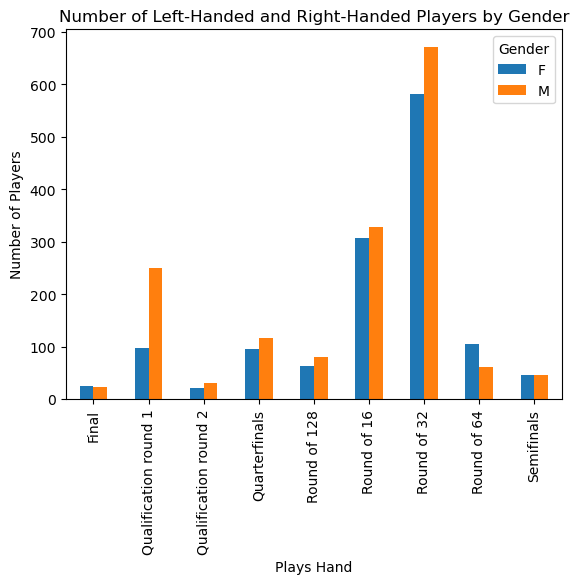

In [22]:
merged_home = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home'])
merged_away = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away'])
home_wins = merged_home[merged_home['winner_code'] == 1][['match_id','player_id', 'full_name', 'weight', 'height','country' , 'current_rank' ,'plays' , 'gender' ]].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['match_id','player_id', 'full_name', 'weight', 'height','country' , 'current_rank', 'plays' , 'gender']].copy()
allWinners = pd.concat([home_wins, away_wins])
allWinners = allWinners.drop_duplicates(subset=['player_id']).sort_values(by='current_rank')
winners_with_rounds= pd.merge(allWinners , MatchRoundInfo[[ 'match_id', 'name']], on='match_id')


hand_gender_counts = winners_with_rounds.groupby(['name', 'gender']).size().unstack(fill_value=0)
# Plotting
hand_gender_counts.plot(kind='bar', stacked=False)

# Adding labels and title
plt.xlabel('Plays Hand')
plt.ylabel('Number of Players')
plt.title('Number of Left-Handed and Right-Handed Players by Gender')
plt.legend(title='Gender')

# Display the plot
plt.show()

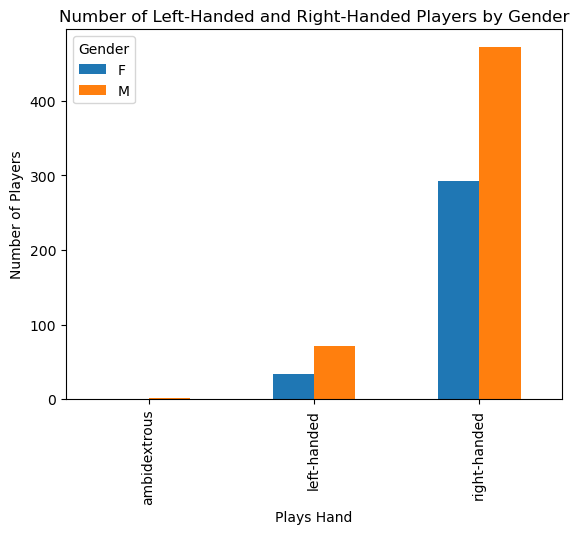

In [14]:
hand_gender_counts = allWinners.groupby(['plays', 'gender']).size().unstack(fill_value=0)

# Plotting
hand_gender_counts.plot(kind='bar', stacked=False)

# Adding labels and title
plt.xlabel('Plays Hand')
plt.ylabel('Number of Players')
plt.title('Number of Left-Handed and Right-Handed Players by Gender')
plt.legend(title='Gender')

# Display the plot
plt.show()

In [27]:
allplayersInfo = pd.concat([MatchAwayTeamInfo[['match_id','player_id' ,'height', 'full_name' ,'current_rank' ]] ,MatchHomeTeamInfo[['match_id','player_id' ,'height', 'full_name' ,'current_rank' ]] ])
allplayersInfo = allplayersInfo.drop_duplicates(subset=['full_name'])
merged = pd.merge( allplayersInfo[['match_id' ,'player_id', 'full_name']], MatchTournamentInfo[['match_id','tournament_name','tournament_category_name','ground_type']] ,  on='match_id')

# finding the top player 

home_merge = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=["home"])
away_marge = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=["away"])

# Create a DataFrame for home wins and away wins
home_wins = home_merge[home_merge['winner_code'] == 1][['player_id', 'name']].copy()
away_wins = away_marge[away_marge['winner_code'] == 2][['player_id', 'name']].copy()

# Combine home wins and away wins
all_wins = pd.concat([home_wins, away_wins])

# Calculate the number of wins for each player
win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

# Merge with player names
player_names = all_wins[['player_id', 'name']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

# Find the player with the highest number of wins
top_player = win_counts.loc[win_counts['wins'].idxmax()]
merged[merged['player_id']==top_player['player_id']]
MatchTournamentInfo[MatchTournamentInfo['match_id']==12299621]

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
200,12299621,129669,"Gifu, Singles Main, W-ITF-JPN-05A",gifu-singles-main-w-itf-jpn-05a,NaN,ITF Women,itf-women,29,Hardcourt outdoor,NaN,False,True,True,False,0,2
2003,12299621,129669,"Gifu, Singles Main, W-ITF-JPN-05A",gifu-singles-main-w-itf-jpn-05a,NaN,ITF Women,itf-women,30,Hardcourt outdoor,NaN,True,True,True,False,0,2


In [17]:
home_merge = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=["home"])
away_marge = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=["away"])

# Create a DataFrame for home wins and away wins
home_wins = home_merge[home_merge['winner_code'] == 1][['player_id', 'name']].copy()
away_wins = away_marge[away_marge['winner_code'] == 2][['player_id', 'name']].copy()

# Combine home wins and away wins
all_wins = pd.concat([home_wins, away_wins])

# Calculate the number of wins for each player
win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

# Merge with player names
player_names = all_wins[['player_id', 'name']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

# Find the player with the highest number of wins
top_player = win_counts.loc[win_counts['wins'].idxmax()]

top_player


# 


player_id         253356
wins                  75
name         Uchijima M.
Name: 0, dtype: object

In [37]:
allplayersInfo = pd.concat([MatchAwayTeamInfo[['match_id','player_id' , 'full_name' ]] ,MatchHomeTeamInfo[['match_id','player_id' , 'full_name'  ]] ])
allplayersInfo = allplayersInfo.drop_duplicates(subset=['full_name'])
allPlayers_withPoints = pd.merge(allplayersInfo , GameInfo[['match_id', 'home_point' , 'away_point']])
BestWinnerPerformance = allPlayers_withPoints[allPlayers_withPoints['player_id']==top_player['player_id']]
matchesUnique = BestWinnerPerformance['match_id'].unique()
matchesUnique

array([12299621])

In [40]:
uniqueCountries = MatchVenueInfo['country'].unique()
uniqueCountries

array(['Spain', 'Croatia', 'Colombia', 'Italy', 'China', 'USA', 'Germany',
       'Japan', 'England', 'France', 'Mexico', 'Brazil', 'Serbia',
       'Tunisia', 'Sweden', 'Turkey', 'Georgia', 'Czech Republic',
       'Romania', 'Argentina', 'Bosnia & Herzegovina', 'Austria',
       'Slovakia', 'Slovenia', 'Jamaica', 'Ethiopia', 'Portugal',
       'Chinese Taipei', 'Dominican Republic', 'Hungary', 'South Korea',
       'North Macedonia', 'Morocco', 'Switzerland'], dtype=object)

In [6]:
import altair as alt
import pandas as pd

# Sample data similar to the description
tournament_counts = pd.DataFrame({
    'Country': ['Country1', 'Country2', 'Country3'],
    'Tournament1': [10, 15, 7],
    'Tournament2': [5, 7, 3]
})

# Melt the DataFrame to a long format suitable for Altair
tournament_counts_long = tournament_counts.melt(id_vars=['Country'], var_name='Tournament Name', value_name='Number of Tournaments')

# Create the stacked bar plot using Altair
chart = alt.Chart(tournament_counts_long).mark_bar().encode(
    x=alt.X('Country:N', title='Country'),
    y=alt.Y('Number of Tournaments:Q', title='Number of Tournaments', stack=True),
    color=alt.Color('Tournament Name:N', title='Tournament Name')
).properties(
    width=600,
    height=400,
    title='Tournaments Held in Each Country'
).configure_legend(
    orient='right'
)

# Display the chart
chart.show()


alt.Chart(...)

In [46]:
MatchTournamentInfo['tournament_category_name'].unique()

array(['ITF Women', 'ATP', 'Challenger', 'ITF Men', 'Challenger Women',
       'WTA'], dtype=object)

In [50]:
merged = pd.merge(allplayersInfo , MatchEventInfo , on='match_id')
merged['winner_code'].unique()

array([ 2.,  1., nan])

In [4]:
import plotly.express as px
import pandas as pd

# Sample data similar to the description
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
Countries_with_Tournaments.columns
tournament_counts = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0).reset_index()

tournament_counts_long = tournament_counts.melt(id_vars=['country'], var_name='Tournament Name', value_name='Number of Tournaments')

# Create the stacked bar plot using Plotly
fig = px.bar(
    tournament_counts_long,
    x='country',
    y='Number of Tournaments',
    color='Tournament Name',
    title='Tournaments Held in Each Country',
    labels={'Number of Tournaments': 'Number of Tournaments', 'country': 'Country'},
    height=500,
    width=800
)

# Customize the layout for a more modern look
fig.update_layout(
    title={ 'text': 'Tournaments Held in Each Country', 'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' } ,
    legend_title_text='Tournament Name',
    legend=dict( orientation="v", yanchor="bottom", y=1.02, xanchor="right", x=1 ),
    barmode='stack',
    xaxis_title='Country',
    yaxis_title='Number of Tournaments'
)

# Show the chart
fig.show()

In [1]:
import plotly.express as px
import pandas as pd

# Sample data similar to the description
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
Countries_with_Tournaments.columns
tournament_counts = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0).reset_index()

tournament_counts_long = tournament_counts.melt(id_vars=['country'], var_name='Tournament Name', value_name='Number of Tournaments')

# Create the stacked bar plot using Plotly
fig = px.bar( tournament_counts_long, x='country', y='Number of Tournaments', color='Tournament Name',title='Tournaments Held in Each Country',
    labels={'Number of Tournaments': 'Number of Tournaments', 'country': 'Country'}, height=500, width=800
)

# Customize the layout for a more modern look
fig.update_layout(
    title={
        'text': 'Tournaments Held in Each Country',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_text='Tournament Name',
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    barmode='stack',
    xaxis_title='Country',
    yaxis_title='Number of Tournaments'
)

# Save the chart to an HTML file
fig.write_html("tournaments_held_in_each_country.html")

# Output message to inform the user
print("The chart has been saved to 'tournaments_held_in_each_country.html'. Open this file in a web browser to view the chart.")


NameError: name 'MatchVenueInfo' is not defined

In [42]:
""" finding the most popular country """
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
Countries_with_Tournaments.columns
tournament_counts = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0)
totalMatches = tournament_counts.groupby('country').sum().sum(axis=1).sort_values(ascending=False)
most_popular_country = totalMatches.idxmax()
most_popular_country

"""now calculating the mathces in each of the cities of the popular country """
popular_matches = MatchVenueInfo[MatchVenueInfo['country'] == most_popular_country]
grouped_cities =(popular_matches.groupby('city' ,as_index= False)
                 .agg(totalPlayes = ('match_id','count'))
                 .sort_values('totalPlayes', ascending=False))
grouped_cities

,city,totalPlayes
5,Paris,1157
7,Saint-Gaudens,125
3,Deauville,118
2,Carnac,110
4,Lyon,93
1,Bordeaux,92
8,Strasbourg,88
0,Aix-en-Provence,50
6,Saint Malo,40
